In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [9]:
stasiun4 = pd.read_csv('stasiun_4_intrp.csv')

In [4]:
stasiun4

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [10]:
stasiun4.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun4['date'] = pd.to_datetime(stasiun4['date'])

In [53]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [72]:
model_RR = get_model(stasiun4, 'RR')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14740\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
23:51:59 - cmdstanpy - INFO - Chain [1] start processing
23:51:59 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [74]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.496083,-3.736678,32.995604
1,2016-01-02,15.144074,-3.503019,32.958575
2,2016-01-03,15.348915,-1.878672,32.088803
3,2016-01-04,14.973873,-2.566930,33.158707
4,2016-01-05,16.086439,-1.210551,35.950033


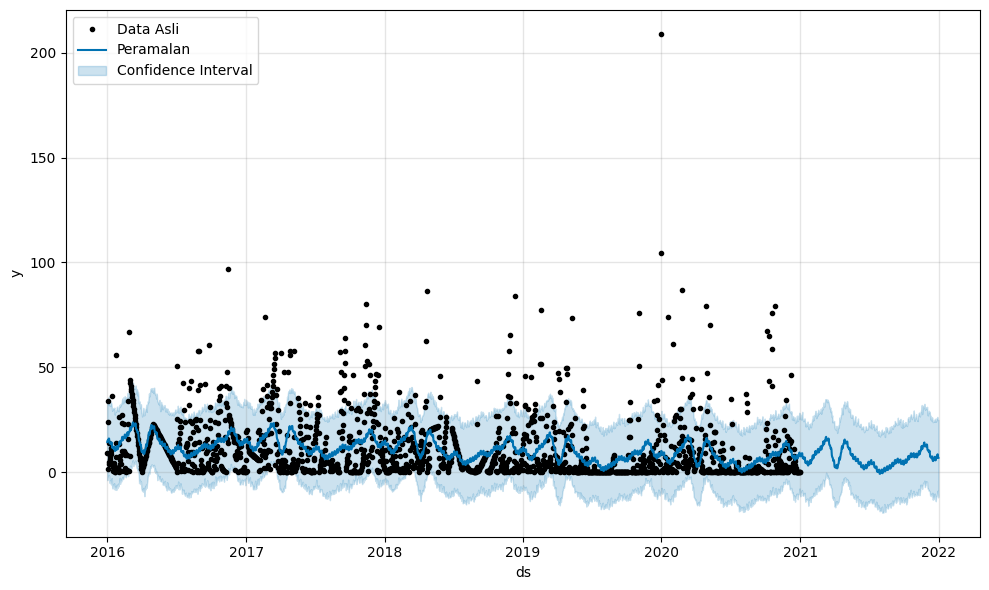

In [75]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [63]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun4[column][len(stasiun4)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [64]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.65906838818018
Mean Squared Error :  201.70223585170652
Mean Absolute Percentage Error :  1.5936622014210415


### Create Sunshine Duration Prediction Model

In [76]:
model_ss = get_model(stasiun4, 'ss')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14740\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
23:52:34 - cmdstanpy - INFO - Chain [1] start processing
23:52:34 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast = model_ss.predict(future_dates)

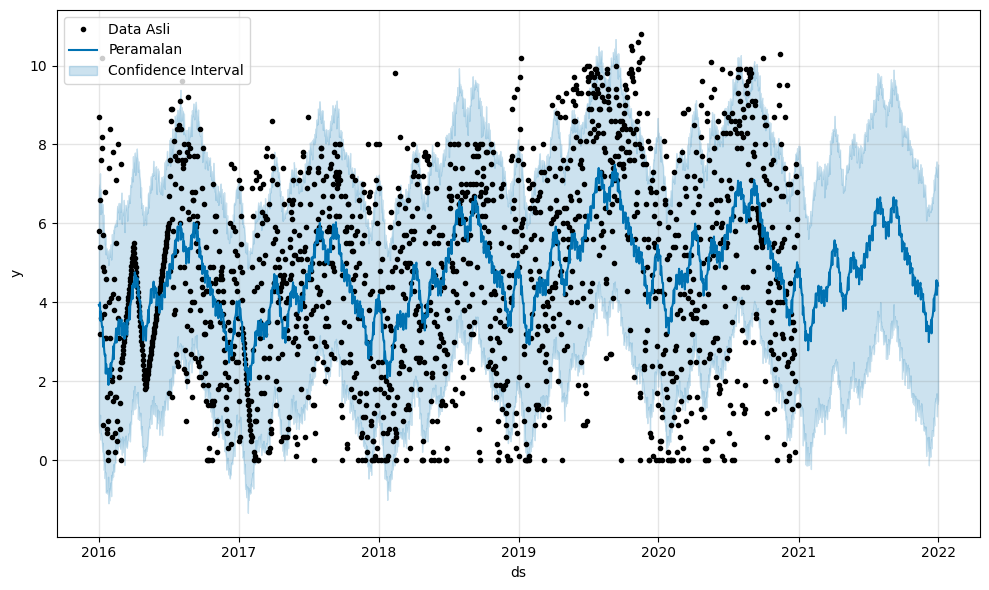

In [78]:
model_ss.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [79]:
triple_metric(forecast, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


### Create Average Wind Direction Predict Model

In [80]:
model_ddd = get_model(stasiun4, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14740\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
23:55:01 - cmdstanpy - INFO - Chain [1] start processing
23:55:01 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd.predict(future_dates)

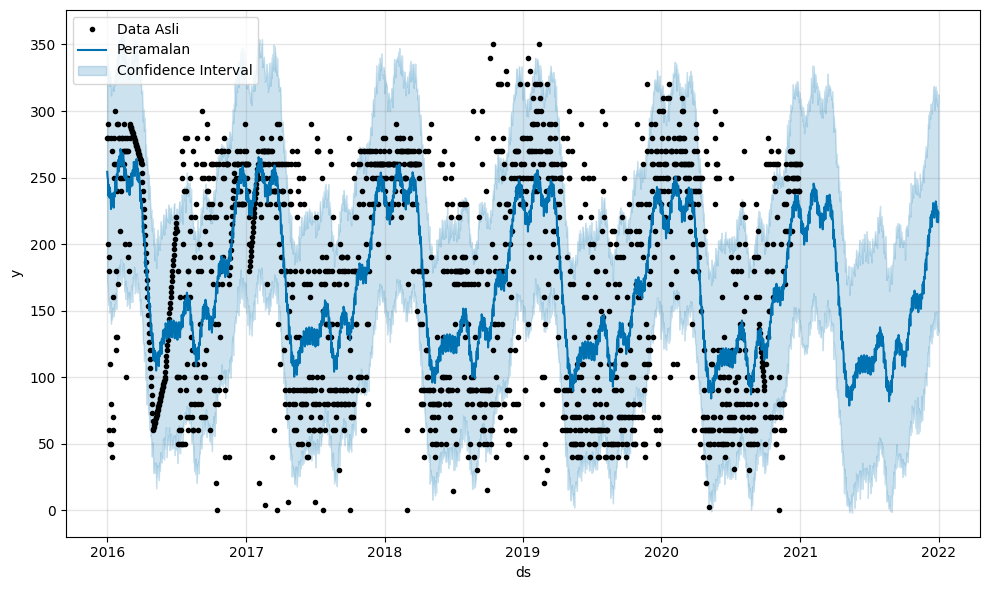

In [82]:
model_ddd.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [83]:
triple_metric(forecast, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


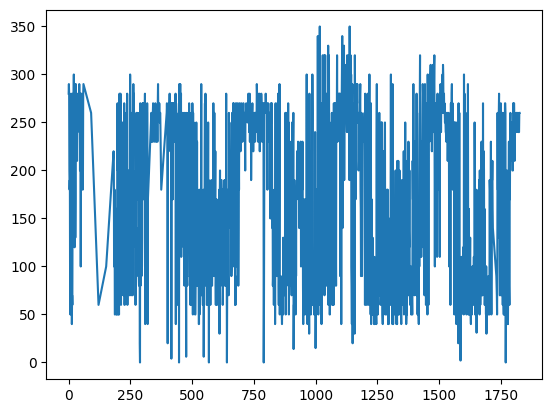

In [84]:
plt.plot(stasiun4['ddd_x'])

In [93]:
df_copy = stasiun4.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [95]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

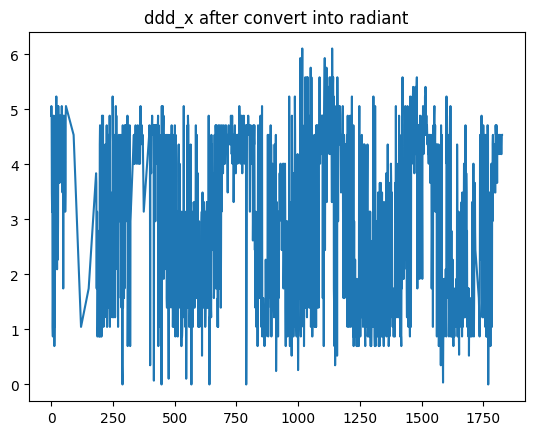

In [96]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [100]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14740\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
00:09:47 - cmdstanpy - INFO - Chain [1] start processing
00:09:47 - cmdstanpy - INFO - Chain [1] done processing


In [101]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd_2.predict(future_dates)

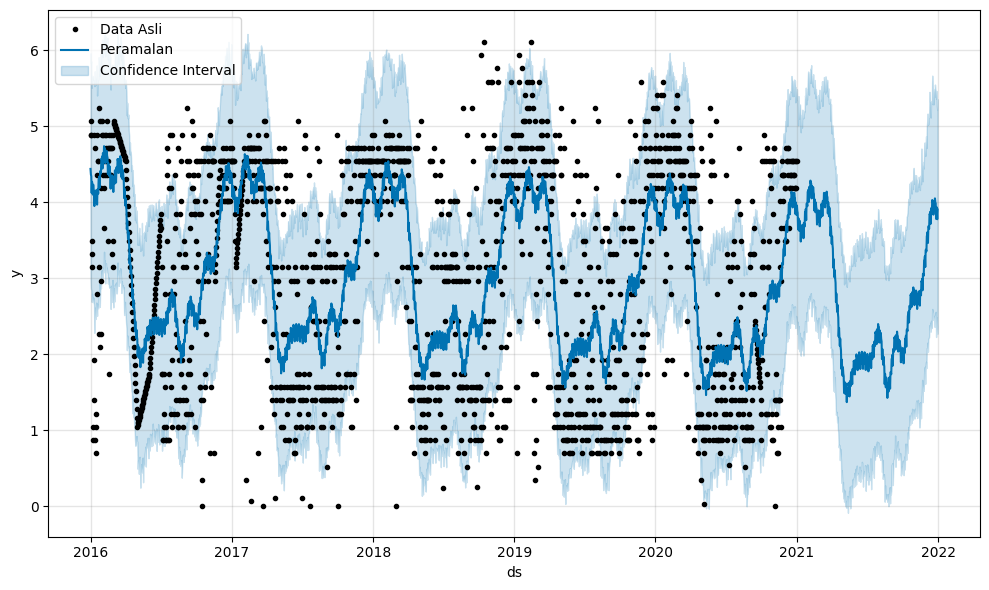

In [102]:
model_ddd_2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [104]:
mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813
